In [59]:
# Description: machine learning algorithim for detecting sms spam with logistic regression, naive bayes and support vector classifier

In [60]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.ensemble import VotingClassifier

In [61]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/kaggle/spam.csv', encoding='latin-1')

# Data Exploration & Data Cleaning

In [62]:
# observe data
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [63]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [64]:
# drop useless columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [65]:
# rename columns
df.columns = ['spam_or_ham', 'text']
df

,spam_or_ham,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [66]:
# check for missing data
df.isnull().sum()

,0
spam_or_ham,0
text,0


In [67]:
# check for duplicate smses
df.duplicated().sum()

403

In [68]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [69]:
# observe data metrics
df.describe()

,spam_or_ham,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [70]:
# observe counts for each of spam and ham
df['spam_or_ham'].value_counts()

,count
spam_or_ham,
ham,4516
spam,653


# Data Visualisation

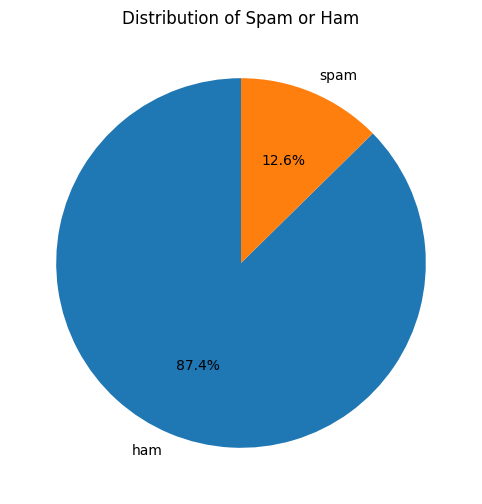

In [71]:
# distribution plot of spam or ham value counts
plt.figure(figsize=(10, 6))
plt.pie(df['spam_or_ham'].value_counts(), labels=df['spam_or_ham'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam or Ham')
plt.show()

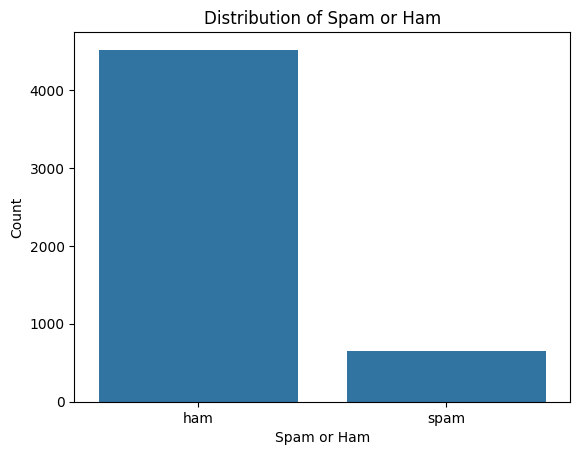

In [72]:
sns.countplot(data=df, x='spam_or_ham')
plt.title('Distribution of Spam or Ham')
plt.xlabel('Spam or Ham')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [73]:
# initialise label encoder
le = LabelEncoder()
df['spam_or_ham'] = le.fit_transform(df['spam_or_ham'])
df

,spam_or_ham,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [74]:
# store independant and dependant variables
X = df['text']
Y = df['spam_or_ham']

In [75]:
# split variables into train and test data
split = int(0.7 * len(df))

X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

In [76]:
# observe shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3618,) (1551,) (3618,) (1551,)


# Feature Engineering

In [77]:
# initialise tf-idf vectorizer and convert texts into numeric features
tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [78]:
# observe X_train
print(X_train)

  (0, 6581)	0.19949313608833633
  (0, 829)	0.3438974817476516
  (0, 2855)	0.16817017149427124
  (0, 1609)	0.29321734176458897
  (0, 1371)	0.32749451570065086
  (0, 3555)	0.2994534600316485
  (0, 6754)	0.2487733200485858
  (0, 2883)	0.19892732697764068
  (0, 1373)	0.29321734176458897
  (0, 1012)	0.27141240436264613
  (0, 1837)	0.27878816677949453
  (0, 4697)	0.27141240436264613
  (0, 3451)	0.3438974817476516
  (1, 4390)	0.5423018102622861
  (1, 6671)	0.43016317644923674
  (1, 3424)	0.5423018102622861
  (1, 3581)	0.39511111071508787
  (1, 4369)	0.26582766031601646
  (2, 63)	0.2360744944471533
  (2, 894)	0.1721297788767476
  (2, 4962)	0.17505572859586552
  (2, 6311)	0.1240402547857685
  (2, 5761)	0.2055651115215094
  (2, 4918)	0.18011895085289117
  (2, 5000)	0.16706655661972192
  :	:
  (3614, 3113)	0.2577576290001695
  (3614, 1972)	0.26703721987523443
  (3614, 1689)	0.17480652996067547
  (3614, 6147)	0.17773631478412258
  (3614, 2904)	0.17180560085569538
  (3614, 3788)	0.17154322935300015

In [79]:
# observe X_test
print(X_test)

  (0, 6563)	0.3127789984670892
  (0, 6179)	0.3312174775227374
  (0, 4669)	0.36894461364275766
  (0, 3788)	0.29445384653321766
  (0, 2904)	0.2949042070544734
  (0, 2409)	0.6068037222137099
  (0, 2156)	0.33832208972567446
  (1, 6022)	0.27865517598616735
  (1, 5357)	0.3066644342741602
  (1, 4676)	0.38952161495302606
  (1, 2710)	0.47000870481044715
  (1, 1684)	0.31678724594507474
  (1, 1358)	0.4297651598817366
  (1, 856)	0.4130625796324088
  (2, 6231)	1.0
  (3, 5378)	0.48161219022909885
  (3, 3746)	0.41628167171418085
  (3, 2645)	0.513428777759115
  (3, 1882)	0.5754564780992205
  (5, 6273)	0.5031313110444732
  (5, 3788)	0.3166245991558765
  (5, 3534)	0.5460854995184519
  (5, 2904)	0.31710886934353777
  (5, 2091)	0.49783565486553505
  (6, 6758)	0.3503246744304131
  :	:
  (1546, 4184)	0.27654840718418056
  (1546, 4015)	0.2867229371538249
  (1546, 2257)	0.2736376257457522
  (1546, 1762)	0.22636033489962035
  (1546, 1615)	0.2098698428862774
  (1546, 1362)	0.2659455527546813
  (1546, 547)	0.286

# Logistic Regression

In [80]:
# create machine learning model for Logistic Regression
lr = LogisticRegression().fit(X_train,Y_train)

In [81]:
# observe model score
lr.score(X_train,Y_train)

0.960751796572692

In [82]:
# observe model predictions
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
# observe classification report
print(classification_report(Y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1362
           1       0.97      0.66      0.79       189

    accuracy                           0.96      1551
   macro avg       0.96      0.83      0.88      1551
weighted avg       0.96      0.96      0.95      1551



In [84]:
# observe accuracy score in percentage form
accuracy_score(Y_test, lr.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, lr.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 95.62%


In [85]:
# test model
test_texts = ['Congratulations on completing your Codsoft internship!',
              'Congrats! You have won a free trip to Hawaii. Click the link to claim your prize',
              'Hey son, please take the chicken out of the freezer.',
              'Congratulations! You have graduated university. Click the link to book your seat']
transformed_texts = tfidf.transform(test_texts)
lr.predict(transformed_texts)

array([0, 1, 0, 0])

In [86]:
# print test into results and classify by ham or spam
for i in range(len(test_texts)):
  if lr.predict(transformed_texts)[i] == 0:
    print(f'{test_texts[i]} is a HAM')
  else:
    print(f'{test_texts[i]} is a SPAM')

Congratulations on completing your Codsoft internship! is a HAM
Congrats! You have won a free trip to Hawaii. Click the link to claim your prize is a SPAM
Hey son, please take the chicken out of the freezer. is a HAM
Congratulations! You have graduated university. Click the link to book your seat is a HAM


# Naive Bayes

In [87]:
# create machine learning model for Naive Bayes
nb = MultinomialNB().fit(X_train,Y_train)

In [88]:
# observe model score
nb.score(X_train,Y_train)

0.9789939192924267

In [89]:
# observe model predictions
nb.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
# observe classification report
print(classification_report(Y_test,nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       1.00      0.68      0.81       189

    accuracy                           0.96      1551
   macro avg       0.98      0.84      0.89      1551
weighted avg       0.96      0.96      0.96      1551



In [91]:
# observe accuracy score in percentage form
accuracy_score(Y_test, nb.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, nb.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 96.07%


In [92]:
# test model
test_texts = ['Congratulations on completing your Codsoft internship!',
              'Congrats! You have won a free trip to Hawaii. Click the link to claim your prize',
              'Hey son, please take the chicken out of the freezer.',
              'Congratulations! You have graduated university. Click the link to book your seat']
transformed_texts = tfidf.transform(test_texts)
nb.predict(transformed_texts)

array([0, 1, 0, 0])

In [93]:
# print test into results and classify by ham or spam
for i in range(len(test_texts)):
  if nb.predict(transformed_texts)[i] == 0:
    print(f'{test_texts[i]} is a HAM')
  else:
    print(f'{test_texts[i]} is a SPAM')

Congratulations on completing your Codsoft internship! is a HAM
Congrats! You have won a free trip to Hawaii. Click the link to claim your prize is a SPAM
Hey son, please take the chicken out of the freezer. is a HAM
Congratulations! You have graduated university. Click the link to book your seat is a HAM


# Support Vector Classifier

In [94]:
# create machine learning model for Naive Bayes
sv = SVC(kernel='sigmoid', gamma=0.1, probability=True).fit(X_train,Y_train)

In [95]:
# observe model score
sv.score(X_train,Y_train)

0.9162520729684909

In [96]:
# observe model predictions
sv.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
# observe classification report
print(classification_report(Y_test,sv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1362
           1       0.98      0.30      0.46       189

    accuracy                           0.91      1551
   macro avg       0.95      0.65      0.70      1551
weighted avg       0.92      0.91      0.89      1551



In [98]:
# observe accuracy score in percentage form
accuracy_score(Y_test, sv.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, sv.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 91.36%


In [99]:
# test model
test_texts = ['Congratulations on completing your Codsoft internship!',
              'Congrats! You have won a free trip to Hawaii. Click the link to claim your prize',
              'Hey son, please take the chicken out of the freezer.',
              'Congratulations! You have graduated university. Click the link to book your seat']
transformed_texts = tfidf.transform(test_texts)
sv.predict(transformed_texts)

array([0, 1, 0, 0])

In [100]:
# print test into results and classify by ham or spam
for i in range(len(test_texts)):
  if sv.predict(transformed_texts)[i] == 0:
    print(f'{test_texts[i]} is a HAM')
  else:
    print(f'{test_texts[i]} is a SPAM')

Congratulations on completing your Codsoft internship! is a HAM
Congrats! You have won a free trip to Hawaii. Click the link to claim your prize is a SPAM
Hey son, please take the chicken out of the freezer. is a HAM
Congratulations! You have graduated university. Click the link to book your seat is a HAM


# Voting Classifier

In [101]:
# create machine learning model for Naive Bayes
vc = VotingClassifier(estimators=[('lr',lr), ('nb',nb),('svc',sv)], voting='soft').fit(X_train,Y_train)

In [102]:
# observe model score
vc.score(X_train,Y_train)

0.9850746268656716

In [103]:
# observe model predictions
vc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
# observe classification report
print(classification_report(Y_test,vc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1362
           1       0.96      0.81      0.88       189

    accuracy                           0.97      1551
   macro avg       0.97      0.91      0.93      1551
weighted avg       0.97      0.97      0.97      1551



In [105]:
# observe accuracy score in percentage form
accuracy_score(Y_test, vc.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, vc.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 97.36%


In [106]:
# test model
test_texts = ['Congratulations on completing your Codsoft internship!',
              'Congrats! You have won a free trip to Hawaii. Click the link to claim your prize',
              'Hey son, please take the chicken out of the freezer.',
              'Congratulations! You have graduated university. Click the link to book your seat']
transformed_texts = tfidf.transform(test_texts)
vc.predict(transformed_texts)

array([0, 1, 0, 0])

In [107]:
# print test into results and classify by ham or spam
for i in range(len(test_texts)):
  if vc.predict(transformed_texts)[i] == 0:
    print(f'{test_texts[i]} is a HAM')
  else:
    print(f'{test_texts[i]} is a SPAM')

Congratulations on completing your Codsoft internship! is a HAM
Congrats! You have won a free trip to Hawaii. Click the link to claim your prize is a SPAM
Hey son, please take the chicken out of the freezer. is a HAM
Congratulations! You have graduated university. Click the link to book your seat is a HAM


# RESULTS

In [108]:
# store model names and models in a list
model_names = ['Logistic Regression', 'Support Vector Classifier', 'Naive Bayes', 'Voting Classifier']
models = [lr, sv, nb, vc]

In [109]:
# create empty lists to store scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [110]:
# calculate scores for each model
for model in models:
    accuracy = accuracy_score(Y_test, model.predict(X_test))
    roc_score = roc_auc_score(Y_test, model.predict(X_test))
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(Y_test, model.predict(X_test)))
    precision_scores.append(precision_score(Y_test, model.predict(X_test)))
    recall_scores.append(recall_score(Y_test, model.predict(X_test)))

In [111]:
# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores})

results_df

,Model,Accuracy,ROC Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.956157,0.829219,0.786164,0.968992,0.661376
1,Support Vector Classifier,0.913604,0.647781,0.455285,0.982456,0.296296
2,Naive Bayes,0.960671,0.838624,0.807571,1.000000,0.677249
3,Voting Classifier,0.973565,0.905205,0.882521,0.962500,0.814815
